# **Exploratory Data Analysis of Uber Dataset**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('/content/UberDataset.csv')

In [56]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [57]:
df.shape

(1156, 7)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [59]:
df['PURPOSE'].fillna('NOT',inplace=True)

/tmp/ipython-input-59-585564661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('NOT',inplace=True)


In [60]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [61]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [63]:
df['Date'] = df['START_DATE'].dt.date
df['Time'] = df['START_DATE'].dt.hour

In [64]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [65]:
df['Shift'] = pd.cut(df['Time'],bins=[0,10,15,19,24],labels=['Morning','Evening','Afternoon','Night'])

In [66]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Shift
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Evening


In [67]:
df.dropna(inplace=True)

## **Trip Category Distribution**
It displays the number of Uber trips by category — typically split between Business and Personal. It helps identify how Uber is predominantly used.

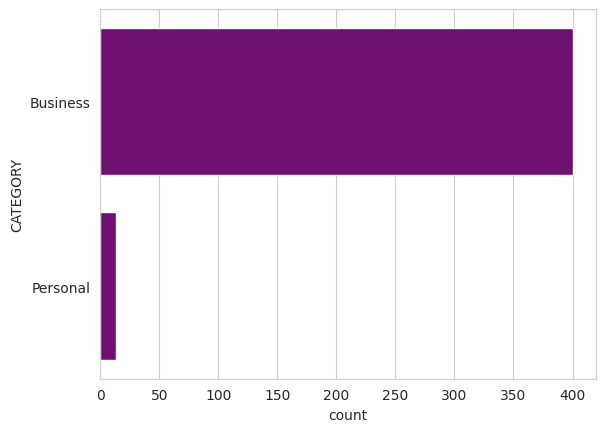

In [68]:
sns.set_style("whitegrid")
sns.countplot(df['CATEGORY'],color='purple');

## **Purpose of Trip Distribution**
It shows the number of Uber trips by purpose, such as Meeting, Meal/Entertain, Errand/Supplies, etc.The plot reveals the most common reasons for using Uber.

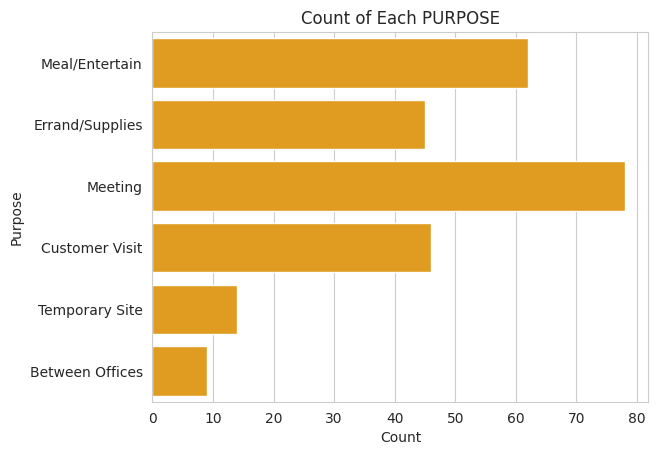

In [91]:
filtered_df = df[df['PURPOSE'] != 'NOT']

sns.countplot(y='PURPOSE',data=filtered_df,color='orange')
plt.title('Count of Each PURPOSE')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

## **Trip Count by Shift**

It displays how Uber trips are distributed across different shifts representing times of day such as Morning, Afternoon, or Evening.

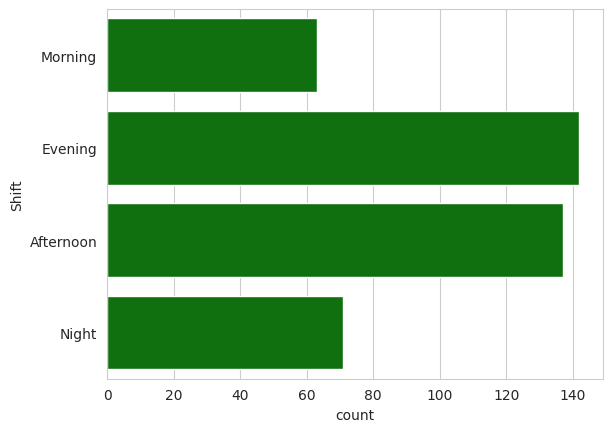

In [70]:
sns.countplot(df['Shift'],color='green');

In [71]:
df['Month'] = df['START_DATE'].dt.month

In [72]:
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['Month'] = df['Month'].map(month_mapping)
count = df['Month'].value_counts(sort=False)

## **Monthly Trip Volume Trend**
It shows the number of Uber trips taken each month,The red line visualizes how trip frequency changes throughout the year, helping identify seasonal trends, such as peaks in business or travel activity during certain months.

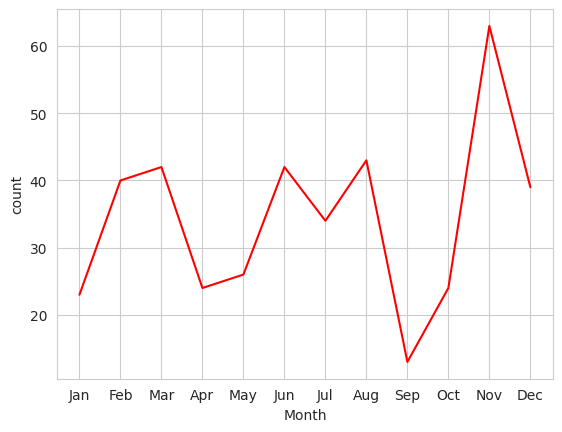

In [75]:
sns.lineplot(x=count.index,y=count,color='red');

In [77]:
df['Day'] = df.START_DATE.dt.weekday
day_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day'] = df['Day'].map(day_mapping)

In [80]:
df_Day=df['Day'].value_counts()

## **Weekly Trip Distribution**

It shows the number of Uber trips for each day of the week, from Monday to Sunday.

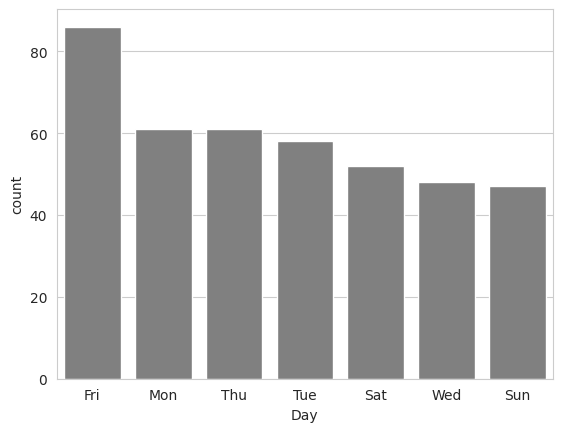

In [83]:
sns.barplot(x=df_Day.index,y=df_Day,color='Gray');

## **Box Plot of Trip Distances**
It visualizes the distribution of trip distances (MILES) in the dataset. The blue box highlights the interquartile range (IQR), while the horizontal line inside the box represents the median distance. Points outside the whiskers indicate potential outliers, such as unusually long trips.

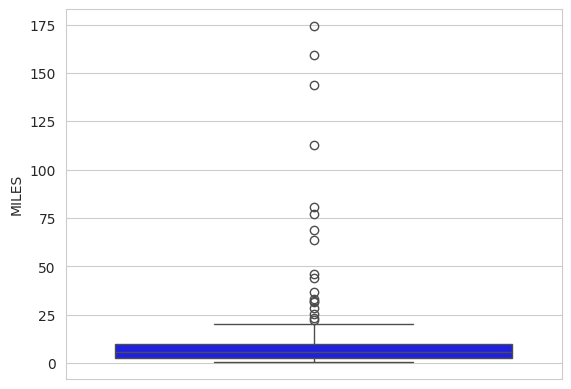

In [84]:
sns.boxplot(df['MILES'],color='blue');

## **KDE Plot of Trip Distances**
It shows the distribution of Uber trip distances (MILES). The red curve represents the probability density, offering a smooth view of how frequently different trip distances occur. Peaks in the curve indicate common trip lengths, while the spread shows variability.

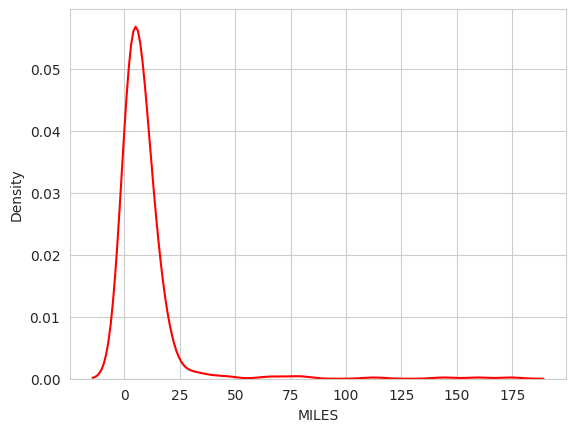

In [90]:
sns.kdeplot(df['MILES'],color='red');